In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.15


In [2]:
images=image.load_images('data/digits')

[0]: 178 files found
[1]: 182 files found
[2]: 177 files found
[3]: 183 files found
[4]: 181 files found
[5]: 182 files found
[6]: 181 files found
[7]: 179 files found
[8]: 174 files found
[9]: 180 files found


In [3]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [  0.00000000e+00   4.71341124e+00   8.25158598e+01   1.88401224e+02
   1.88589872e+02   9.17840846e+01   2.15581525e+01   2.04785754e+00
   8.51419032e-02   3.14913745e+01   1.65203116e+02   1.90677240e+02
   1.63504174e+02   1.30023372e+02   2.92036728e+01   1.70005565e+00
   4.22927101e-02   4.11185309e+01   1.57575960e+02   1.11080690e+02
   1.12814691e+02   1.24173066e+02   2.82609905e+01   7.82971619e-01
   1.66944908e-02   3.90011130e+01   1.44642181e+02   1.40286589e+02
   1.58007791e+02   1.20022816e+02   3.66889260e+01   3.33889816e-02
   0.00000000e+00   3.70083472e+01   1.21928770e+02   1.44347245e+02
   1.63978854e+02   1.39081803e+02   4.60222593e+01   0.00000000e+00
   1.37451308e-01   2.49860879e+01   1.09460768e+02   1.14961046e+02
   1.21993879e+02   1

In [4]:
data.vectors.shape

(1797, 64)

In [5]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


In [6]:
C=NaiveBayes()

timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  0.0044629573822021484 seconds 
On Training Set: 86.4884929473
On Test Set: 85.3333333333


## Do the PCA part, reducing the dimensionality

In [7]:
F=PCA(5)  # only the top 5

In [8]:
data_train_reduced=F.fit_transform_data(data_train)
data_test_reduced=F.transform_data(data_test)

In [9]:
train_vectors_reduced=F.fit_transform(data_train.vectors)
test_vectors_reduced=F.transform(data_test.vectors)

In [10]:
print("shape train vectors:",data_train.vectors.shape)
print("shape train vectors reduced:",data_train_reduced.vectors.shape)

shape train vectors: (1347, 64)
shape train vectors reduced: (1347, 5)


In [11]:
timeit(reset=True)
C.fit(data_train_reduced.vectors,data_train_reduced.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train_reduced.vectors,data_train_reduced.targets))
print("On Test Set:",C.percent_correct(data_test_reduced.vectors,data_test_reduced.targets))

Time Reset
Training time:  0.0032341480255126953 seconds 
On Training Set: 86.1172976986
On Test Set: 84.0


In [12]:
F.weights.shape

(5, 64)

## Visualizing the components

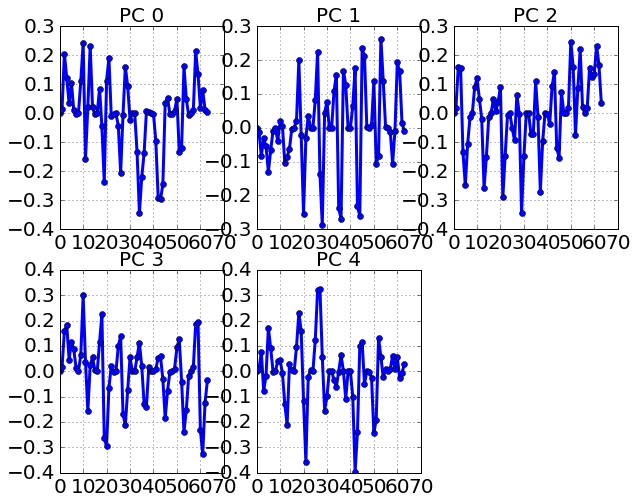

In [13]:
F.plot()

you can specify which ones to plot

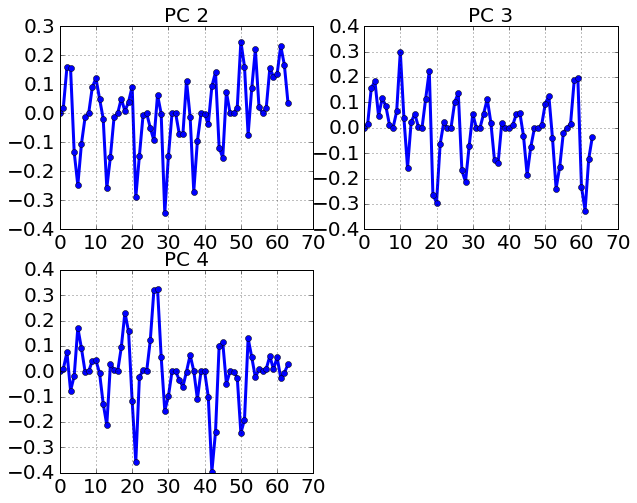

In [14]:
F.plot([2,3,4])

## if it is an image, then you can show the components as images

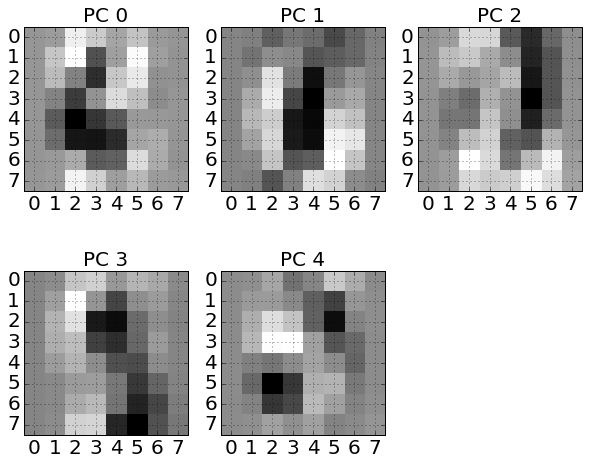

In [15]:
F.imshow(shape=(8,8))

## Tuning the number of PCs

specify how many PCs to try...

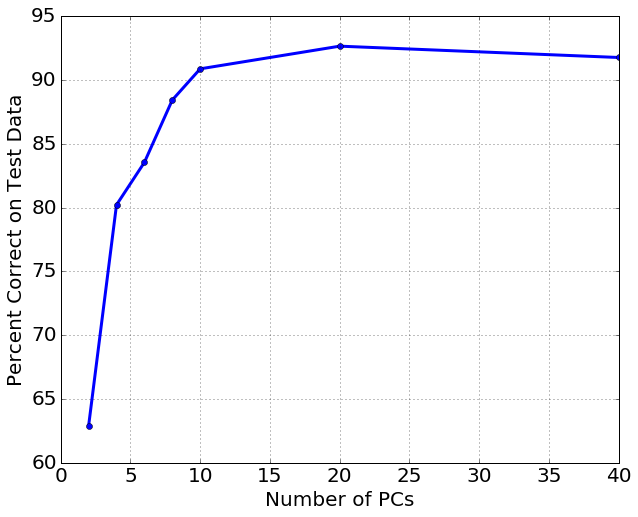

In [16]:
PCs=[2,4,6,8,10,20,40]
percent_correct=[]
for n in PCs:
    F=PCA(n) 
    data_train_reduced=F.fit_transform_data(data_train)
    data_test_reduced=F.transform_data(data_test)    
    
    C=NaiveBayes()
    C.fit(data_train_reduced.vectors,data_train_reduced.targets)
    percent_correct.append(C.percent_correct(data_test_reduced.vectors,data_test_reduced.targets))
    
plot(PCs,percent_correct,'-o')
xlabel('Number of PCs')
ylabel('Percent Correct on Test Data')

this does exactly the same thing, but does every number from 1 to 40, skipping every 2 (1,3,5,7,....,39]

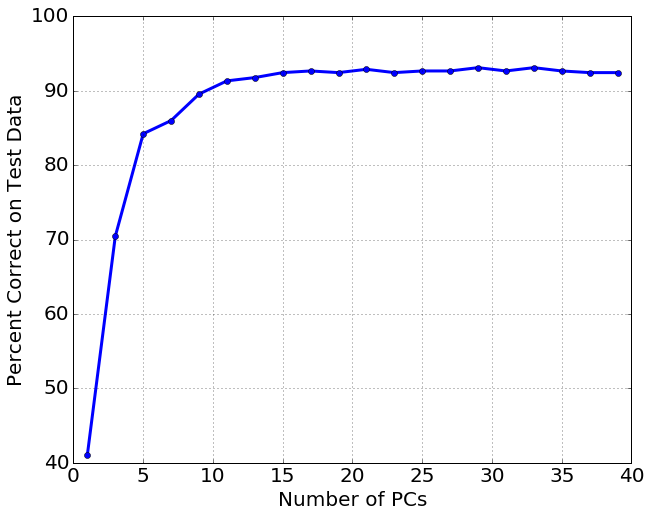

In [17]:
PCs=arange(1,40,2)
percent_correct=[]
for n in PCs:
    F=PCA(n) 
    data_train_reduced=F.fit_transform_data(data_train)
    data_test_reduced=F.transform_data(data_test)    
    
    C=NaiveBayes()
    C.fit(data_train_reduced.vectors,data_train_reduced.targets)
    percent_correct.append(C.percent_correct(data_test_reduced.vectors,data_test_reduced.targets))
    
plot(PCs,percent_correct,'-o')
xlabel('Number of PCs')
ylabel('Percent Correct on Test Data')

## Getting rid of some PCs

In [18]:
F=PCA(10) 
data_train_reduced=F.fit_transform_data(data_train)
data_test_reduced=F.transform_data(data_test)    

C=NaiveBayes()
C.fit(data_train_reduced.vectors,data_train_reduced.targets)
print(C.percent_correct(data_test_reduced.vectors,data_test_reduced.targets))

90.8888888889


In [19]:
data_train_reduced_removed=extract_features(data_train_reduced,list(range(2,10)))
data_test_reduced_removed=extract_features(data_test_reduced,list(range(2,10)))

C=NaiveBayes()
C.fit(data_train_reduced_removed.vectors,data_train_reduced_removed.targets)
print(C.percent_correct(data_test_reduced_removed.vectors,data_test_reduced_removed.targets))

81.7777777778
